# Task 1: Exploratory Data Analysis (EDA) and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Sanjith\Desktop\Assignment 5\ToyotaCorolla - MLR.csv")

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [ ]:
# Histograms for continuous variables

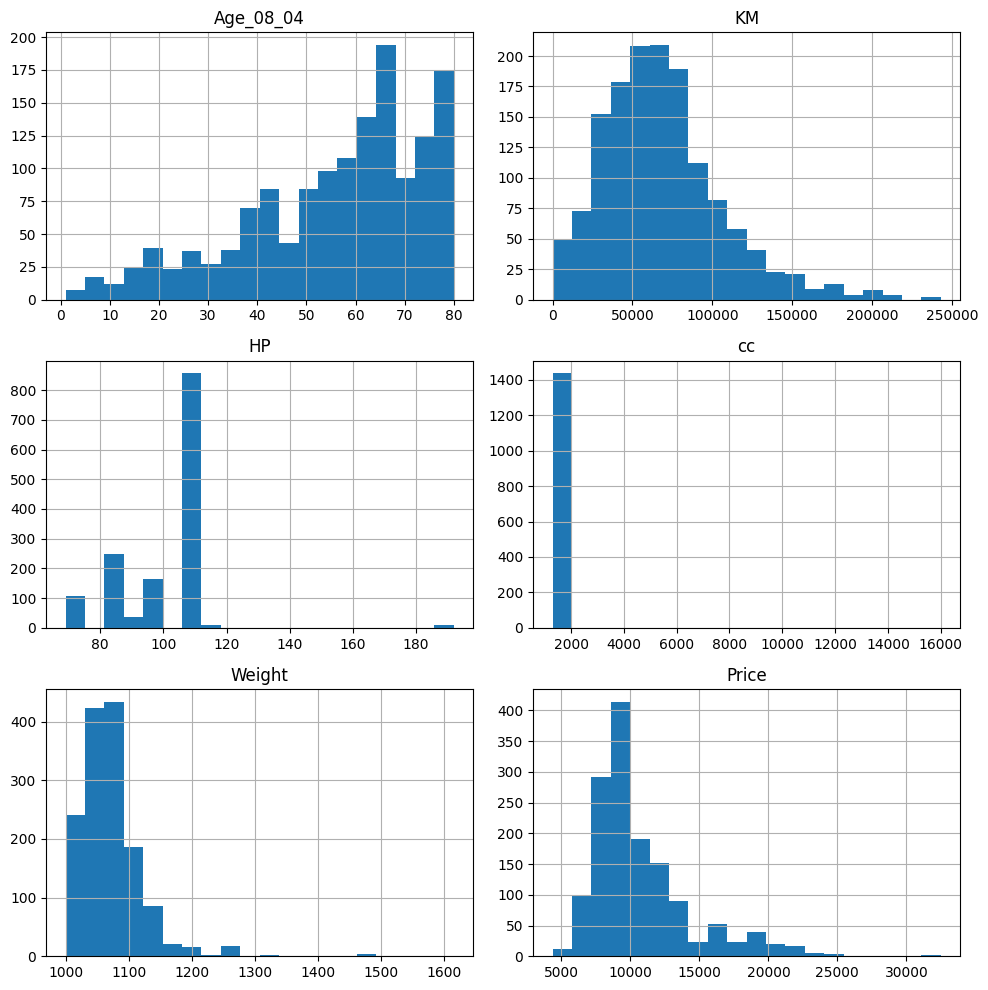

In [13]:
df[['Age_08_04','KM', 'HP', 'cc', 'Weight', 'Price']].hist(bins=20, figsize=(10, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Box plots to check for outliers

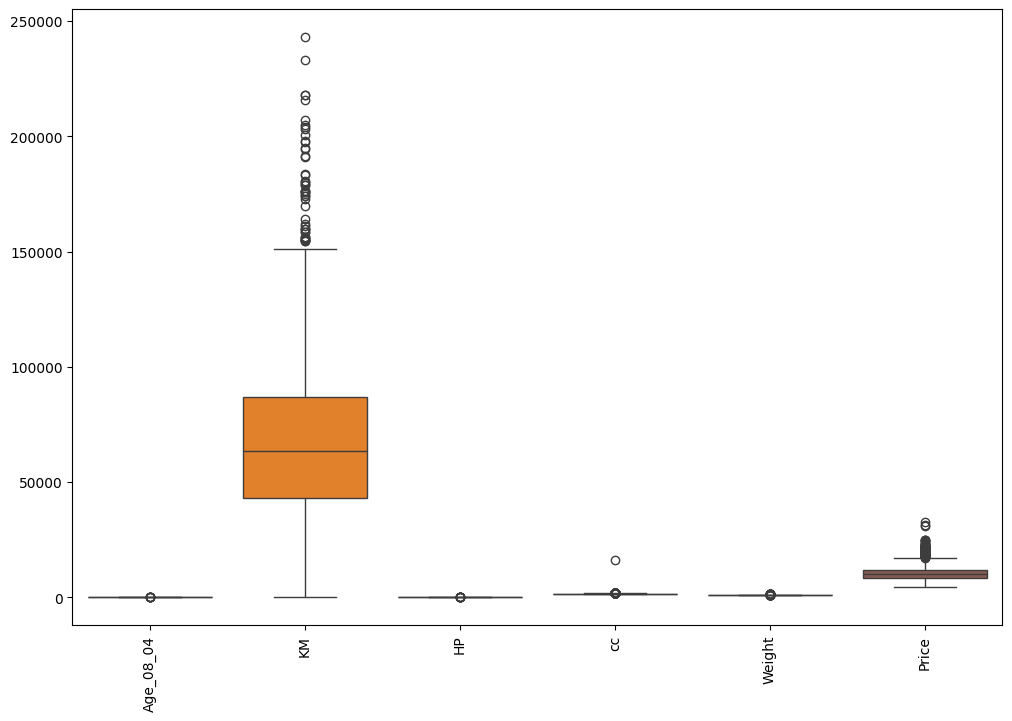

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Correlation heatmap

In [18]:
numeric_df = df.select_dtypes(include=[float, int])

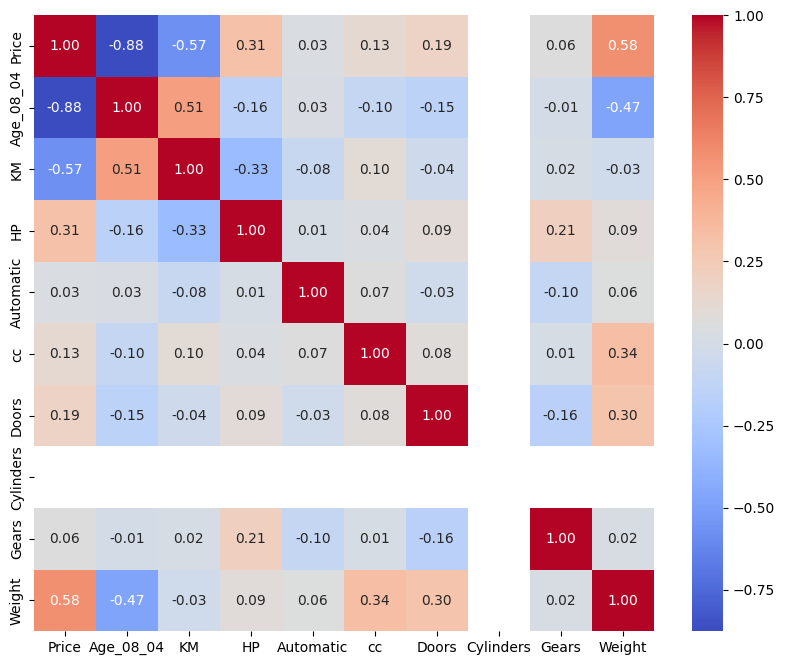

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Pair plot for variable relationships

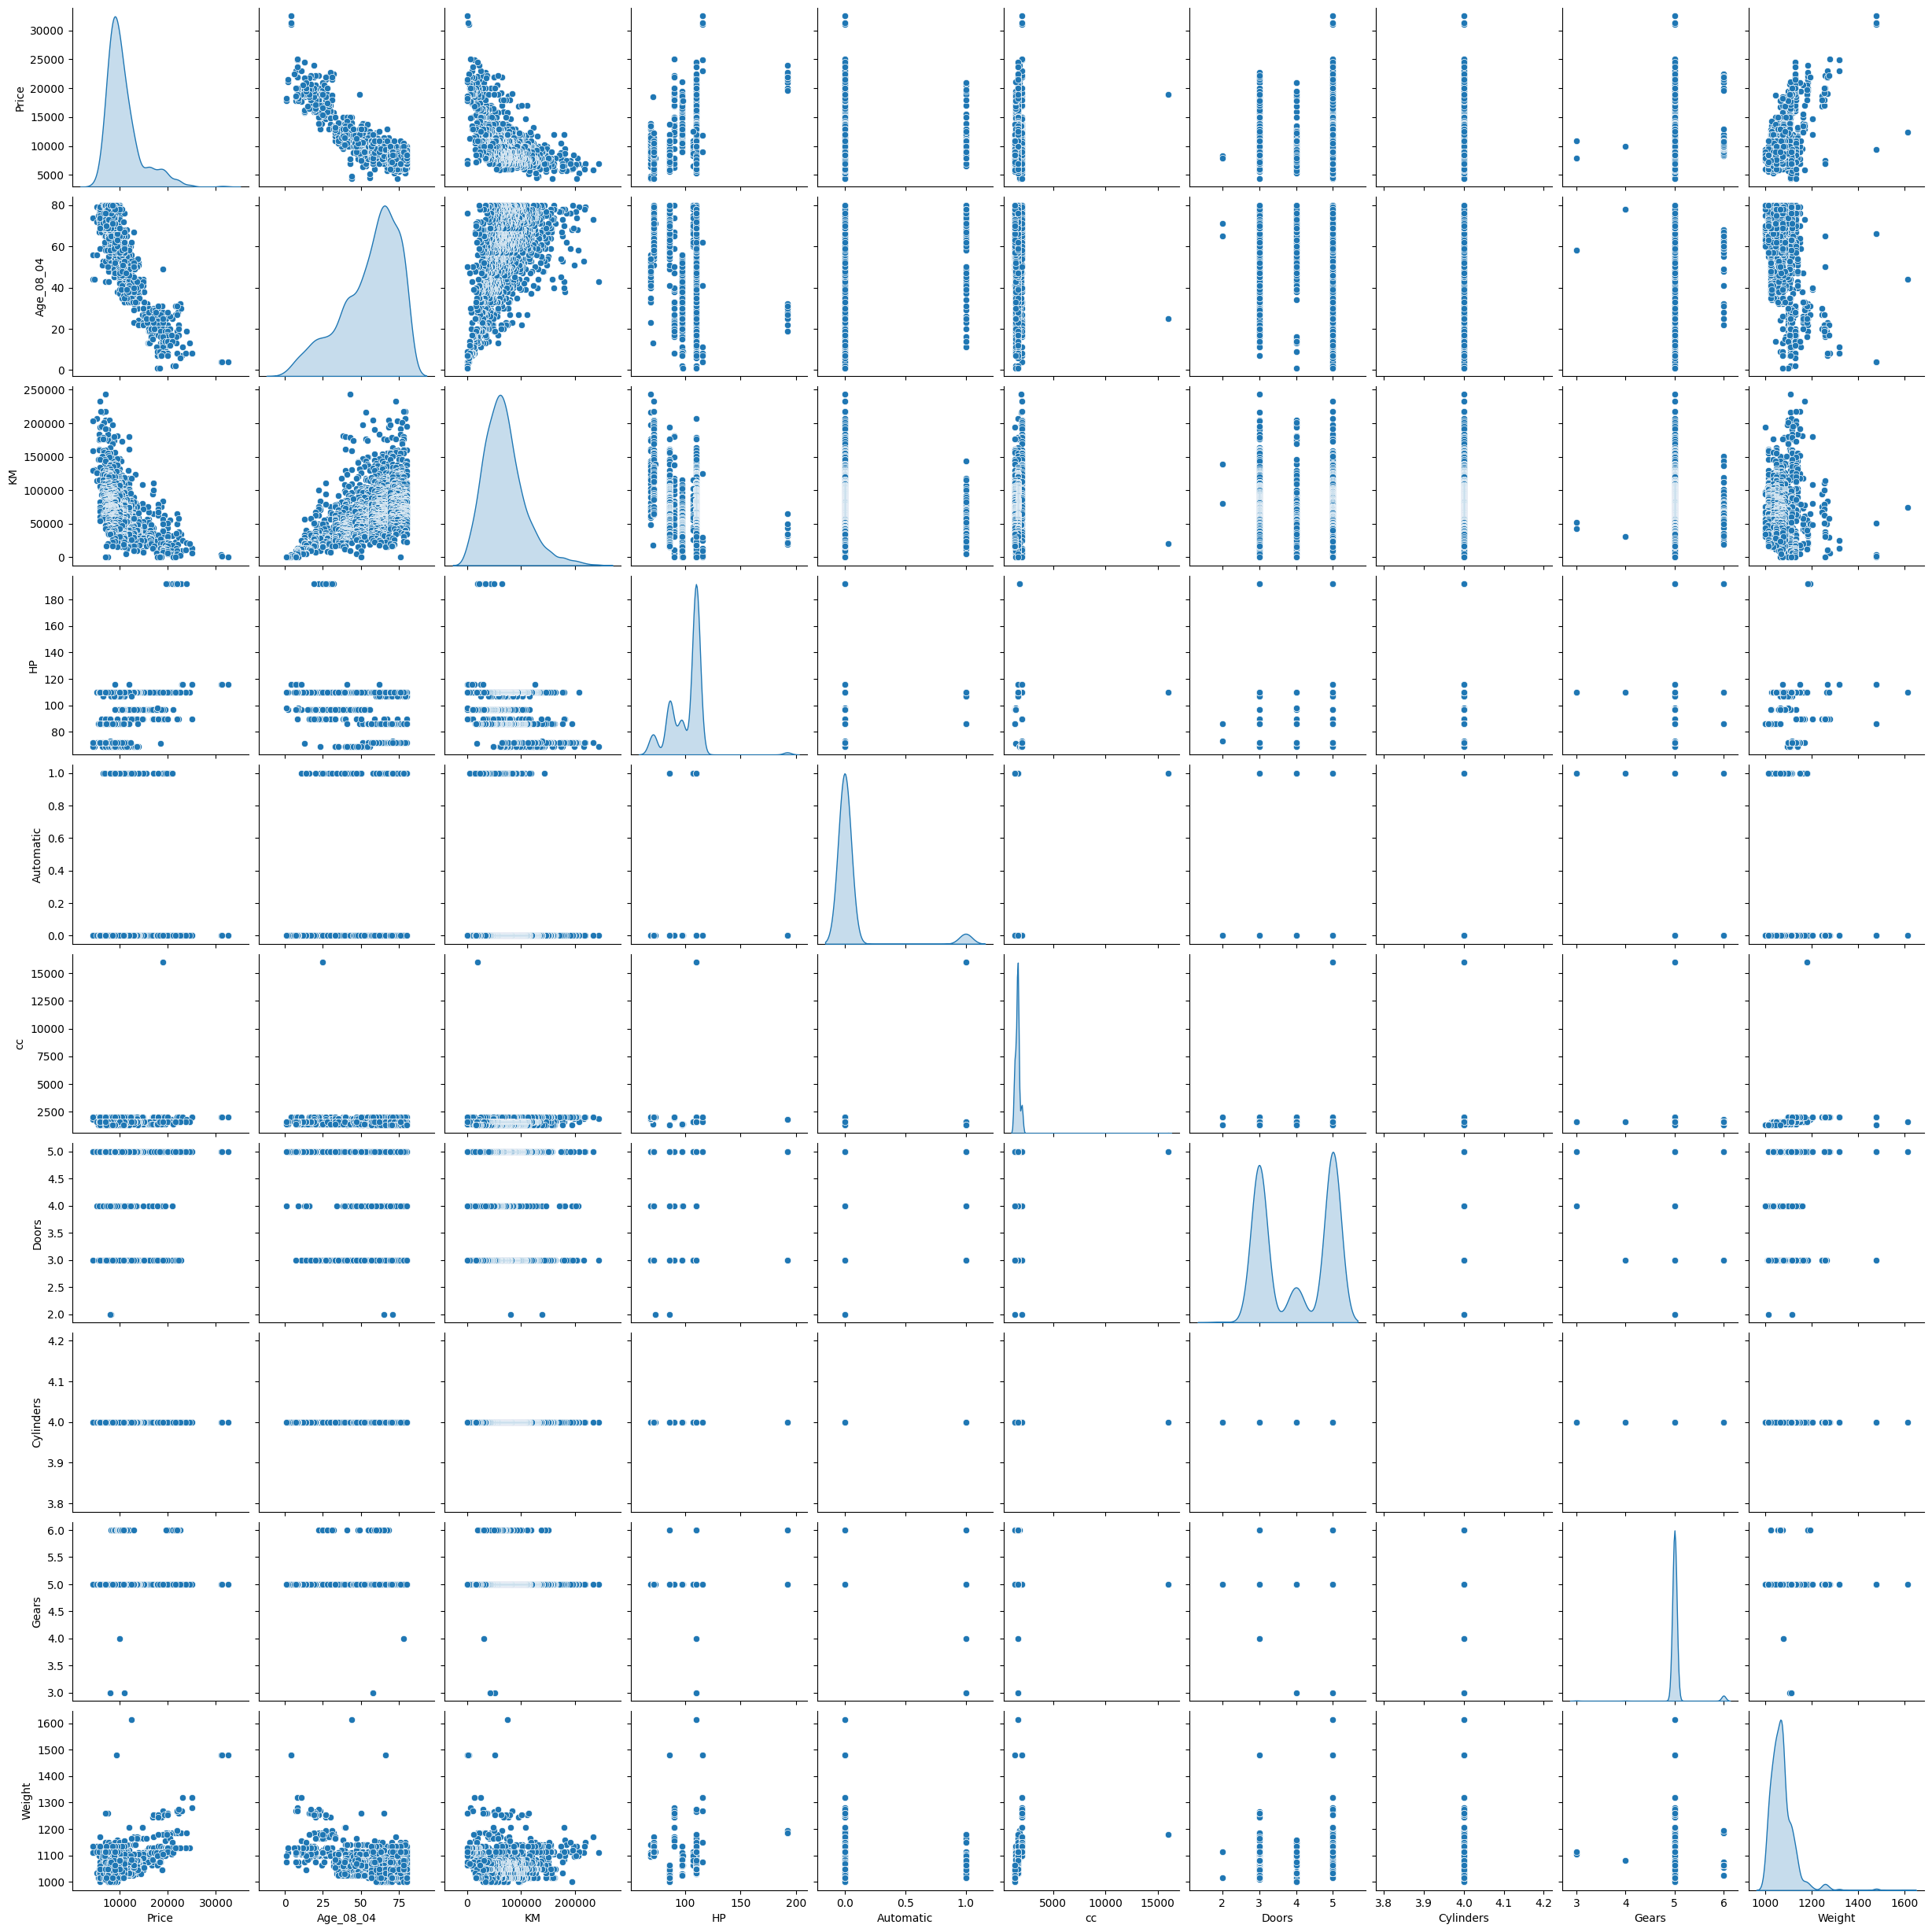

In [22]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [25]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [26]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [27]:
df.dropna(inplace=True)

# Task 2: Splitting the Dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('Price', axis=1)
y = df['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Build Multiple Linear Regression Models

In [31]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# Model 1: Basic Model with All Features

In [32]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [33]:
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

Intercept: -14255.385993565258
Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  1.25055521e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]


In [ ]:
# Model 2: Model without Insignificant Variables

In [35]:
import statsmodels.api as sm

In [37]:
X_train_sm = sm.add_constant(X_train)

In [53]:
# Check data types
print(X_train_sm.dtypes)
print(y_train.dtypes)

print(X_train_sm.isnull().sum())
print(y_train.isnull().sum())

# Handle missing values if any (example: filling with mean)
X_train_sm.fillna(X_train_sm.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

# Add constant to the features
X_train_sm = sm.add_constant(X_train_sm)


Age_08_04           int64
KM                  int64
HP                  int64
Automatic           int64
cc                  int64
Doors               int64
Cylinders           int64
Gears               int64
Weight              int64
Fuel_Type_Diesel     bool
Fuel_Type_Petrol     bool
dtype: object
int64
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64
0


In [ ]:
# Model 3: Interaction Terms or Polynomial Features

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [43]:
model3 = LinearRegression()
model3.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Task 4: Evaluate Model Performance

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
# Evaluate Each Model

In [48]:
# For Model 1

In [47]:
y_pred1 = model1.predict(X_test)
print("Model 1 Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))
print("R2 Score:", r2_score(y_test, y_pred1))

Model 1 Performance:
MAE: 990.8872739193923
MSE: 2203043.8231437006
R2 Score: 0.8348888040611084


In [61]:
# For Model 2

In [62]:
model2 = LinearRegression()

In [64]:
model2.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred2 = model2.predict(X_test)

In [67]:
print("Model 2 Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))
print("R2 Score:", r2_score(y_test, y_pred2))

Model 2 Performance:
MAE: 990.8872739193923
MSE: 2203043.8231437006
R2 Score: 0.8348888040611084


In [68]:
# For Model 3 (Polynomial)

In [69]:
y_pred3 = model3.predict(X_test_poly)
print("Model 3 Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred3))
print("MSE:", mean_squared_error(y_test, y_pred3))
print("R2 Score:", r2_score(y_test, y_pred3))

Model 3 Performance:
MAE: 908.7930900312754
MSE: 3198390.711314661
R2 Score: 0.7602906896915779


In [ ]:
# Task 5: Apply Lasso and Ridge Regularization

In [70]:
from sklearn.linear_model import Lasso, Ridge


In [73]:
# Lasso Regression

In [71]:
lasso = Lasso(alpha=1.0) 
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [72]:
print("Lasso Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Performance:
MAE: 990.9546616159029
MSE: 2195387.2460865397
R2 Score: 0.8354626403967389


In [ ]:
# Ridge Regression

In [74]:
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [75]:
print("Ridge Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Performance:
MAE: 990.733834202601
MSE: 2199746.3702333346
R2 Score: 0.835135937771234


In [ ]:
# Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?


In [ ]:
1. What is Normalization & Standardization and how is it helpful?
Normalization and Standardization are two techniques used to scale or transform features in data preprocessing. They are particularly important in machine learning and statistics because many algorithms assume that the data is normally distributed and scaled similarly.

Normalization (Min-Max Scaling):

Definition: The process of scaling data so that all values fall within a specific range, usually between 0 and 1.
Formula:
𝑋
𝑛
𝑜
𝑟
𝑚
𝑎
𝑙
𝑖
𝑧
𝑒
𝑑
=
𝑋
−
𝑋
𝑚
𝑖
𝑛
𝑋
𝑚
𝑎
𝑥
−
𝑋
𝑚
𝑖
𝑛
X 
normalized
​
 = 
X 
max
​
 −X 
min
​
 
X−X 
min
​
 
​
 
# When the features in your dataset have different ranges, normalization can help bring all features into a similar scale, ensuring that no single feature dominates the learning process.
# When the data is not normally distributed, and the algorithm uses distance-based methods, such as k-NN, K-means, or neural networks.
Standardization (Z-score Scaling):

Definition: Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean and dividing by the standard deviation.
Formula:
𝑋
𝑠
𝑡
𝑎
𝑛
𝑑
𝑎
𝑟
𝑑
𝑖
𝑧
𝑒
𝑑
=
𝑋
−
𝜇
𝜎
X 
standardized
​
 = 
σ
X−μ
​


In [ ]:
2. What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when two or more predictor variables are highly correlated, making it difficult to determine the individual effect of each predictor. Here are some techniques to address multicollinearity:

Remove Highly Correlated Variables:

Method: Identify highly correlated variables (e.g., using a correlation matrix) and remove one of the variables from the model.
You can compute the correlation coefficient or use the Variance Inflation Factor (VIF) to find correlations.
Use Principal Component Analysis (PCA):

Method: PCA is a dimensionality reduction technique that can be used to transform correlated variables into a smaller set of uncorrelated components.
 If the number of predictors is large, and it's difficult to remove variables without losing significant information.
Ridge Regression (L2 Regularization):

Method: Ridge regression adds a penalty term to the cost function to shrink the coefficients of correlated predictors.
It helps to reduce the variance of model coefficients, preventing large swings in the predictions due to multicollinearity.
Lasso Regression (L1 Regularization):

Method: Lasso regression also adds a penalty term but with the ability to force some coefficients to zero. This results in a sparse model where irrelevant or highly correlated variables are eliminated. Lasso can perform both feature selection and regularization simultaneously.
Increase Sample Size:

Method: In some cases, increasing the sample size can reduce the effect of multicollinearity, as more data helps improve the stability of the coefficient estimates.
Combine Correlated Variables:

 If two variables are highly correlated, you can combine them into a single composite variable (e.g., by taking their average or sum).
When to use: When the variables are conceptually similar or represent the same underlying phenomenon.